# Problem Statement

Car Data-
Here, we will apply k-means clustering for grouping the similar cars in one cluster

In [1]:
#Import all the necessary modules

# Import Basic Libraries
import numpy as np
import pandas as pd
import os

# Import Datavisualization Libraries
import seaborn as sns
import matplotlib.pyplot as plt

# Set Theme for Data Visualization
%matplotlib inline
sns.set_style('whitegrid')

# Mitigate Warnings
import warnings
warnings.filterwarnings('ignore')

# Import Libraries for Statistical Analysis
import scipy.stats as stats

# Import Libraries for Train-Test split, Scaling and Label Encoding
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics

# Import Libraries for Unsupervised Learning - Clustering
from sklearn.cluster import KMeans

# Set Options for Tabular Output
pd.set_option('display.max_columns', None)  # or 1000
pd.set_option('display.max_rows', None)  # or 1000
pd.set_option('display.max_colwidth', -1)  # or 199

# Q1. Load the Cars Data file into Python DataFrame and view top 10 rows.

Get the data from here - https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/

In [2]:
# Importing dataset directly from table on website
mpgdf = pd.read_table("https://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep = r'\s+', names = ["mpg","cyl","disp","hp","wt","acc","model year","origin","car name"])
mpgdf.head(5)
# Note that while importing data from webpage in tabular format there could be varying amount of whitespaces, hence using sep = r'\s+'
# \s+ is the regular expression for "any amount of whitespace"

,mpg,cyl,disp,hp,wt,acc,model year,origin,car name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino


### Data Pre-Processing

In [3]:
# 1 Cleaning any leading/trailing whitespace in the column header
mpgdf.columns = [x.strip() for x in mpgdf.columns]
mpgdf.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'model year', 'origin',
       'car name'],
      dtype='object')

# Q2 Print the datatypes of each column and the shape of the dataset. Perform descriptive analysis 

In [4]:
mpgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg           398 non-null float64
cyl           398 non-null int64
disp          398 non-null float64
hp            398 non-null object
wt            398 non-null float64
acc           398 non-null float64
model year    398 non-null int64
origin        398 non-null int64
car name      398 non-null object
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


Horse Power (hp) is represented as object whereas it must be float. This leads to a question the quality of data in 'hp' column. We'll eye - ball all the columns and checkput if there is any pollution in dataset

In [5]:
# Assigning relevant Data Type
mpgdf['model year'] = mpgdf['model year'].astype(object)
mpgdf['origin'] = mpgdf['origin'].astype(object)

In [6]:
mpgdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
mpg           398 non-null float64
cyl           398 non-null int64
disp          398 non-null float64
hp            398 non-null object
wt            398 non-null float64
acc           398 non-null float64
model year    398 non-null object
origin        398 non-null object
car name      398 non-null object
dtypes: float64(4), int64(1), object(4)
memory usage: 28.1+ KB


In [7]:
# Share of Dataset
print("Number of Rows:",mpgdf.shape[0],"\n")
print("Number of Columns:",mpgdf.shape[1])

Number of Rows: 398 

Number of Columns: 9


Before performing descriptive analysis I'll first checkout for pollution in dataset and remove it

# Q3 Check for missing value check, incorrect data and perform imputation with mean, median, mode as necessary.

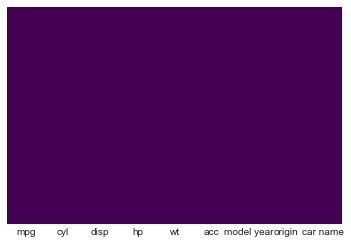

In [8]:
# 2 Missing Value through data visualization
sns.heatmap(mpgdf.isnull(),yticklabels=False,cbar=False,cmap='viridis')

In [9]:
# Writing Data in CSV File for eye-balling
mpgdf.to_csv("mpg-cars.csv")

Insights: In the dataset we can see that in few cells "?" as entry. I believe these are the null/missing values which need to be trated before moving forward

In [10]:
# Indentifying columns with missing values (in this case '?')
mpgdf = mpgdf.replace('?',np.nan) #Converting to null value
mpgdf.isna().any()

mpg           False
cyl           False
disp          False
hp            True 
wt            False
acc           False
model year    False
origin        False
car name      False
dtype: bool

We can see that horsepower in the only column with missing values

In [11]:
# Missing value treatment - imputing the missing value with mean
mpgdf['hp'] = mpgdf['hp'].astype(float, errors = 'ignore') #Converting into float
mpgdf['hp'] = mpgdf['hp'].fillna(mpgdf['hp'].mean()).astype(float)

In [12]:
mpgdf.isna().any()

mpg           False
cyl           False
disp          False
hp            False
wt            False
acc           False
model year    False
origin        False
car name      False
dtype: bool

### Descriptive Analysis

In [13]:
round(mpgdf.describe(),3)

,mpg,cyl,disp,hp,wt,acc,model year,origin
count,398.000,398.000,398.000,398.000,398.000,398.000,398.000,398.000
mean,23.515,5.455,193.426,104.469,2970.425,15.568,76.010,1.573
std,7.816,1.701,104.270,38.199,846.842,2.758,3.698,0.802
min,9.000,3.000,68.000,46.000,1613.000,8.000,70.000,1.000
25%,17.500,4.000,104.250,76.000,2223.750,13.825,73.000,1.000
50%,23.000,4.000,148.500,95.000,2803.500,15.500,76.000,1.000
75%,29.000,8.000,262.000,125.000,3608.000,17.175,79.000,2.000
max,46.600,8.000,455.000,230.000,5140.000,24.800,82.000,3.000


# Q4. Perform bi variate analysis including correlation, pairplots and state the inferences

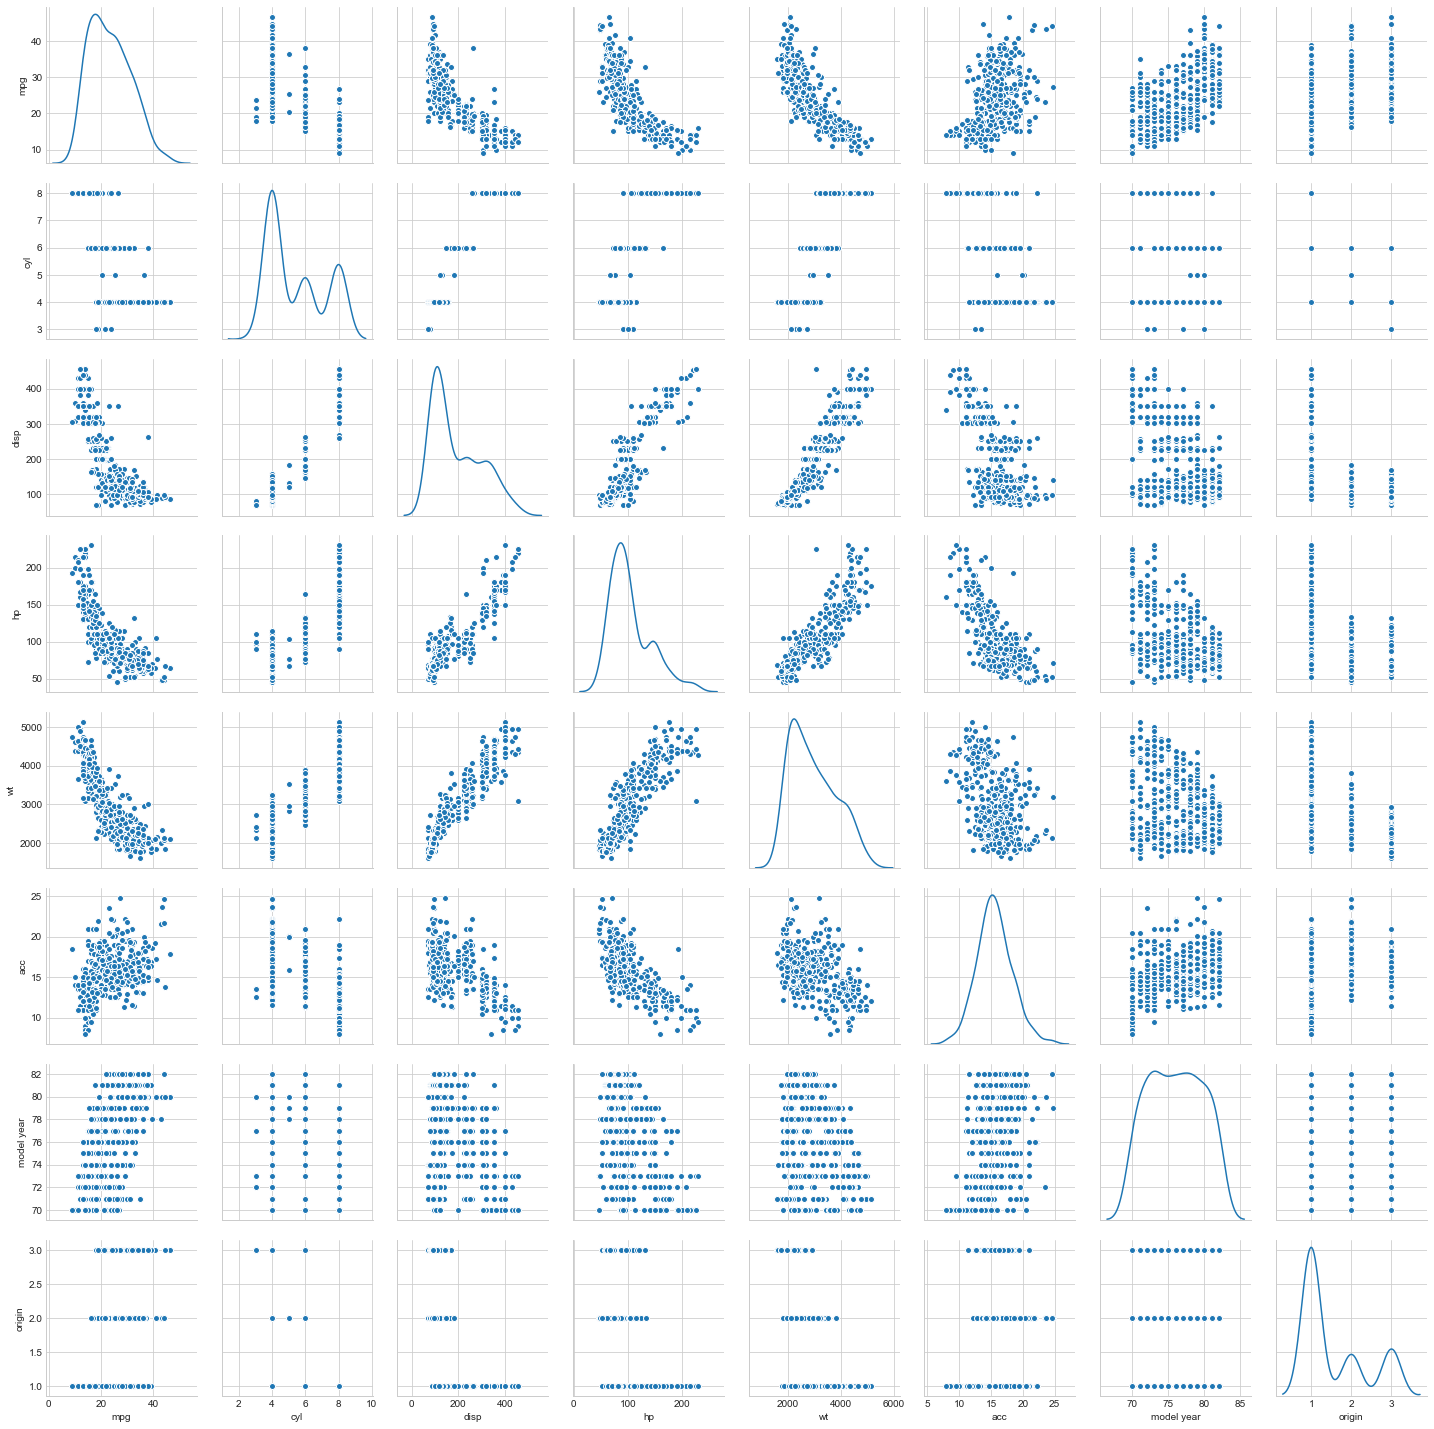

In [14]:
# Pairplot
sns.pairplot(mpgdf,diag_kind = "kde")

Insights: Through pairplot we can see multi-modal gaussian in cylinder and horse power suggesting that there could be possibility of gaussian mix due to different set of clusters in the dataset

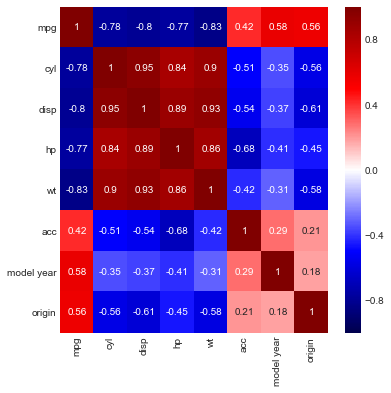

In [15]:
# Correlation

fig, ax = plt.subplots()
fig.set_size_inches(6,6)
sns.heatmap(mpgdf.corr(),annot=True,vmin=-1,vmax=1,cmap='seismic')

Insights: The attributes looks likely to be highly correlated. miles per gallon is negatively correlated with cylinder, displacement, horsepower and weight but, positively correlated with acceleration. cylinder, displacement, horsepower and weight form a strong correlation

# Q5. Perform any feature engineering/transformation and remove any duplicate or irrelevant columns

In [16]:
# Further dig into data shows max mpd is for 4 cylinders vehicles
# Origin as pointed earlier indicates production point so should be broken into dummy variables
# Year would be more effective if we can transorm this to calculate age of vehicle. This dataset was used in 1983 so we would 
         #subtract year from 83 to get the age

In [17]:
#1 Coverting 'Origin' into Dummy Variable
origin = pd.get_dummies(mpgdf['origin'],prefix = "origin",prefix_sep = '_')
origin.head()

,origin_1,origin_2,origin_3
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0


In [18]:
#1.1 Adding Dummy variable into main dataset
mpgdf['origin_1'] = origin['origin_1']
mpgdf['origin_2'] = origin['origin_2']
mpgdf.head()

,mpg,cyl,disp,hp,wt,acc,model year,origin,car name,origin_1,origin_2
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,0


In [19]:
# In the description of the dataset we can see that this data was used in 1993.
# So, we can calculate the age of vehicle with the help of model year

# Coverting model year back to int
mpgdf['model year'] = mpgdf['model year'].astype(int)

# Creating Age column
mpgdf['age'] = 93-mpgdf['model year']

mpgdf.head()

,mpg,cyl,disp,hp,wt,acc,model year,origin,car name,origin_1,origin_2,age
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu,1,0,23
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320,1,0,23
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,plymouth satellite,1,0,23
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,amc rebel sst,1,0,23
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,ford torino,1,0,23


# Q6. Create new data frame with standardize variables and imputation for any missing/outliers

In [35]:
mpgdf.columns

Index(['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc', 'model year', 'origin',
       'car name', 'origin_1', 'origin_2', 'age'],
      dtype='object')

In [36]:
# New Dataframe
mpgsd = mpgdf[['mpg', 'cyl', 'disp', 'hp', 'wt', 'acc','origin_1', 'origin_2', 'age']]
mpgsd.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,age
0,18.0,8,307.0,130.0,3504.0,12.0,1,0,23
1,15.0,8,350.0,165.0,3693.0,11.5,1,0,23
2,18.0,8,318.0,150.0,3436.0,11.0,1,0,23
3,16.0,8,304.0,150.0,3433.0,12.0,1,0,23
4,17.0,8,302.0,140.0,3449.0,10.5,1,0,23


In [37]:
# Standardizing the variable
mpg_sd = mpgsd.apply(stats.zscore)
mpg_sd.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,age
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,0.773559,-0.461968,1.627426
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,0.773559,-0.461968,1.627426
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,0.773559,-0.461968,1.627426
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,0.773559,-0.461968,1.627426
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,0.773559,-0.461968,1.627426


In [38]:
# Missing value check was done above and hp column was treated with mean values
# Let us check for outliers now

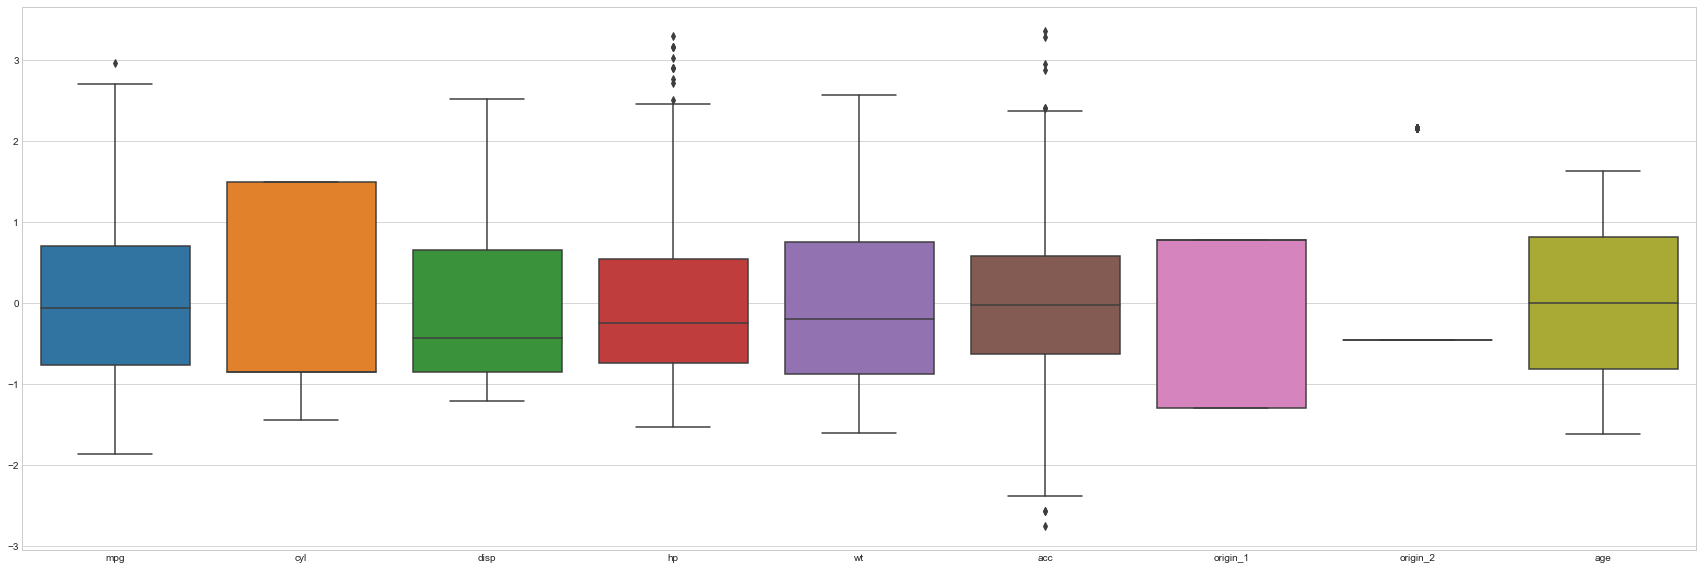

In [39]:
# BOXPLOT to see if there are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = mpg_sd)

We can see through boxplot that few outliers are present in the dataset esp in mpg, hp and acc. So, imputing these with the median

In [40]:
#1 Identification of outliers
#1.1 Calculation of first quantile (Q1), Third Quantile (Q3), and Inter Quantile Range
Q1 = mpg_sd.quantile(0.25)
Q3 = mpg_sd.quantile(0.75)
IQR = Q3 - Q1
l_bound = Q1 - (1.5*IQR)
u_bound = Q3 + (1.5*IQR)
print("IQR for attributes in dataset:\n", round(IQR,2))

IQR for attributes in dataset:
 mpg         1.47
cyl         2.35
disp        1.51
hp          1.28
wt          1.64
acc         1.22
origin_1    2.07
origin_2    0.00
age         1.62
dtype: float64


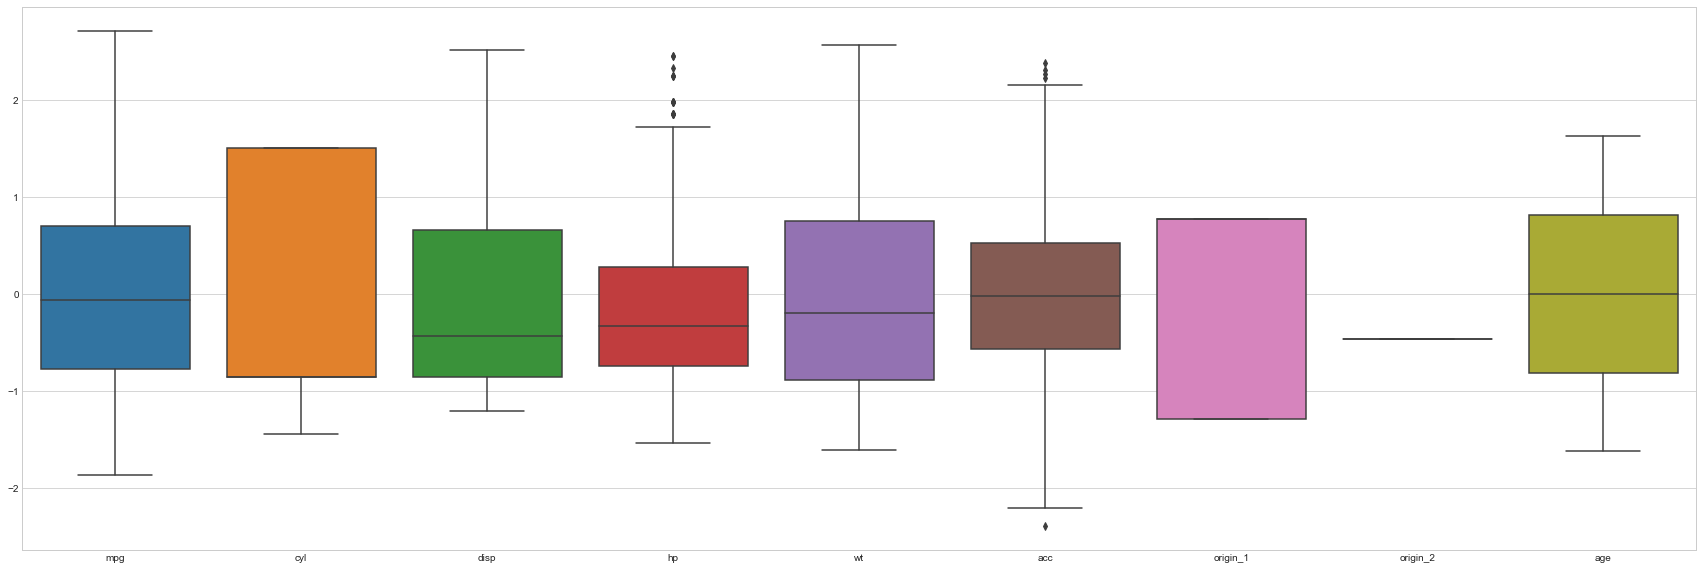

In [45]:
#2 Calculating the median dataset
mpgwb = mpg_sd.copy(deep = True) #Creating a new Workbook
mpgwb[(mpgwb < l_bound) | (mpgwb > u_bound)] = np.nan
mpgwb = mpgwb.fillna(mpgwb.median()).astype(float)

# BOXPLOT to see if there are any outliers in the attributes given in dataset
fig, ax = plt.subplots()
fig.set_size_inches(30, 10)
sns.boxplot(data = mpgwb)

# Q7. Create appropriate clusters with the new data set

In [47]:
#1 Identification of Optimum Number of Clusters
cluster_range = range(2, 13)   # expect 3 to 12 clusters from the pair panel visual inspection hence restricting from 2 to 12
cluster_errors = []
for num_clusters in cluster_range:
  clusters = KMeans(num_clusters, n_init = 5, random_state = 1)
  clusters.fit(mpgwb)
  labels = clusters.labels_
  centroids = clusters.cluster_centers_
  cluster_errors.append(clusters.inertia_)
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )
clusters_df[0:15]

,num_clusters,cluster_errors
0,2,1463.801137
1,3,1110.037980
2,4,912.418043
3,5,758.988792
4,6,694.326888
5,7,639.414665
6,8,585.537375
7,9,544.816426
8,10,507.986465
9,11,492.296455


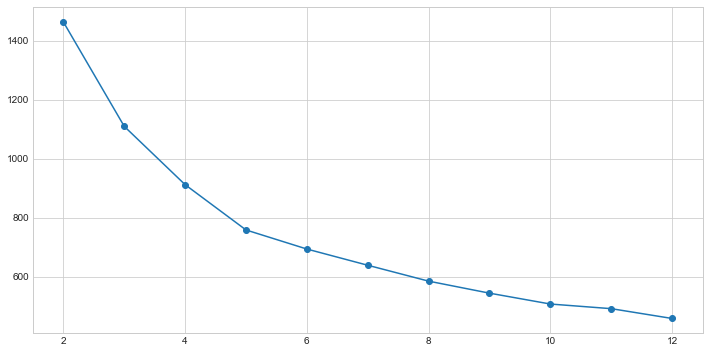

In [49]:
#2 Using Elbow method
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

# Q8. Identify the appropriate clusters with result from above question

Initially we can see drastic drop in cluster error from cluster = 2 to cluster = 3, further the drop is gradual, hence, considering k = 3 for further study

In [50]:
# K means clustering at k = 3
cluster = KMeans(n_clusters = 3, random_state = 1)
cluster.fit(mpgwb)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=1, tol=0.0001, verbose=0)

# Q9. Check for no of values in each cluster and centers for each variables. 

In [52]:
# Centroids
centroids = cluster.cluster_centers_
centroids

array([[ 0.82010762, -0.81683943, -0.85748887, -0.68198545, -0.82915968,
         0.20375183, -1.05333947, -0.46196822, -0.26806269],
       [-1.12726026,  1.4864187 ,  1.46865697,  1.10928745,  1.36736404,
        -0.9556565 ,  0.77355903, -0.46196822,  0.61198576],
       [-0.18503641, -0.10955376, -0.04654867, -0.26231477, -0.00562848,
         0.39200566,  0.71187888, -0.46196822, -0.12862907]])

In [53]:
centroid_df = pd.DataFrame(centroids, columns = list(mpgwb) )
centroid_df

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,age
0,0.820108,-0.816839,-0.857489,-0.681985,-0.829160,0.203752,-1.053339,-0.461968,-0.268063
1,-1.127260,1.486419,1.468657,1.109287,1.367364,-0.955656,0.773559,-0.461968,0.611986
2,-0.185036,-0.109554,-0.046549,-0.262315,-0.005628,0.392006,0.711879,-0.461968,-0.128629


# Q10. Assign the groups created above to data frame and study the characteristics  for each group.

In [54]:
prediction = cluster.predict(mpgwb)
mpgwb["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record
mpgwb.head()

,mpg,cyl,disp,hp,wt,acc,origin_1,origin_2,age,GROUP
0,-0.706439,1.498191,1.090604,0.669196,0.630870,-1.295498,0.773559,-0.461968,1.627426,1
1,-1.090751,1.498191,1.503514,1.586599,0.854333,-1.477038,0.773559,-0.461968,1.627426,1
2,-0.706439,1.498191,1.196232,1.193426,0.550470,-1.658577,0.773559,-0.461968,1.627426,1
3,-0.962647,1.498191,1.061796,1.193426,0.546923,-1.295498,0.773559,-0.461968,1.627426,1
4,-0.834543,1.498191,1.042591,0.931311,0.565841,-1.840117,0.773559,-0.461968,1.627426,1


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001EF6F90EA20>,
      dtype=object)

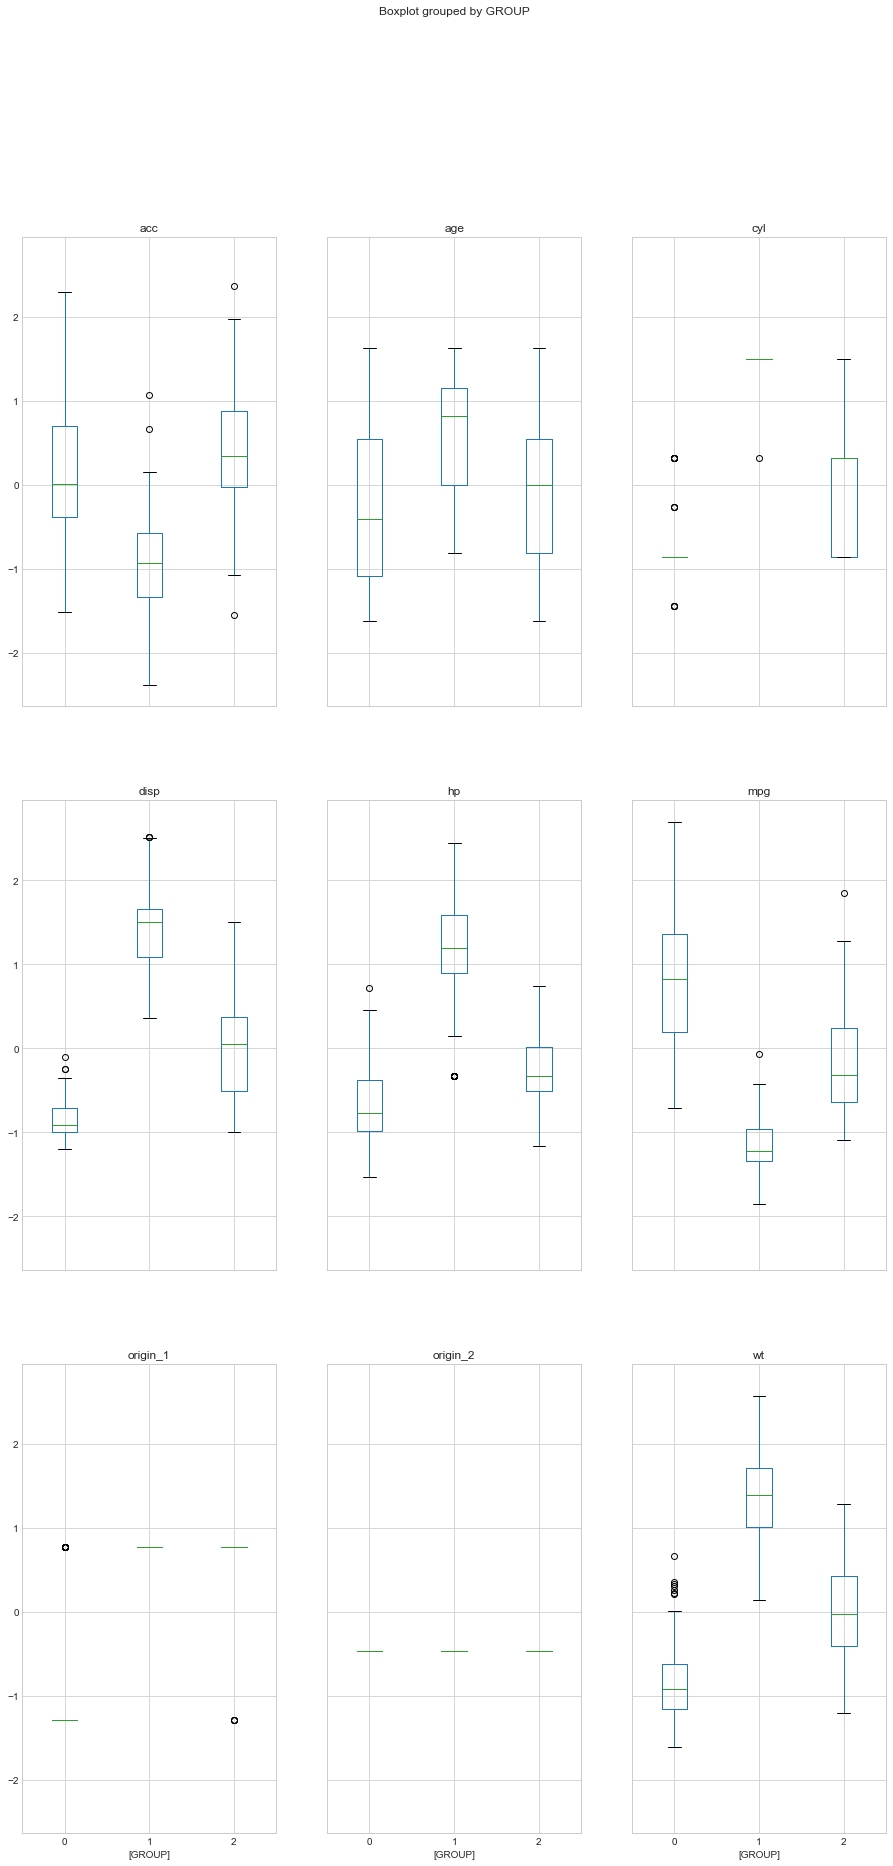

In [55]:
#Boxplot to understand the characteristics of each group
import matplotlib.pylab as plt
mpgwb.boxplot(by = 'GROUP',  layout=(4,3), figsize=(15, 40))

In [56]:
# Calling prediction in original dataset to access the characteristics
mpgdf["GROUP"] = prediction     # Creating a new column "GROUP" which will hold the cluster id of each record
mpgdf.head()
mpgdf.to_csv("mpg-cars_cluster.csv")

In [ ]:
# We can try similar analysis for 3 grps as well to check if we get more clear distinction among groups